In [1]:
# Imort main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for photing and viewing data
import matplotlib.pyplot as plt# plotting library

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('Amazon')

In [4]:
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,12/31/1997,5.041667,4.843750,4.875000,5.020833,4446000,5.020833
1,1/2/1998,5.000000,4.796875,5.000000,4.958333,1660800,4.958333
2,1/5/1998,4.937500,4.708333,4.885417,4.750000,3590400,4.750000
3,1/6/1998,4.875000,4.666667,4.697917,4.838542,4174800,4.838542
4,1/7/1998,4.833333,4.692708,4.833333,4.781250,2725200,4.781250


In [5]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [6]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

ValueError: time data 12/31/1997 doesn't match format specified

In [7]:
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
12/31/1997,5.041667,4.843750,4.875000,5.020833,4446000,5.020833
1/2/1998,5.000000,4.796875,5.000000,4.958333,1660800,4.958333
1/5/1998,4.937500,4.708333,4.885417,4.750000,3590400,4.750000
1/6/1998,4.875000,4.666667,4.697917,4.838542,4174800,4.838542
1/7/1998,4.833333,4.692708,4.833333,4.781250,2725200,4.781250


Text(0.5, 1.0, 'Anazon Stock at all time')

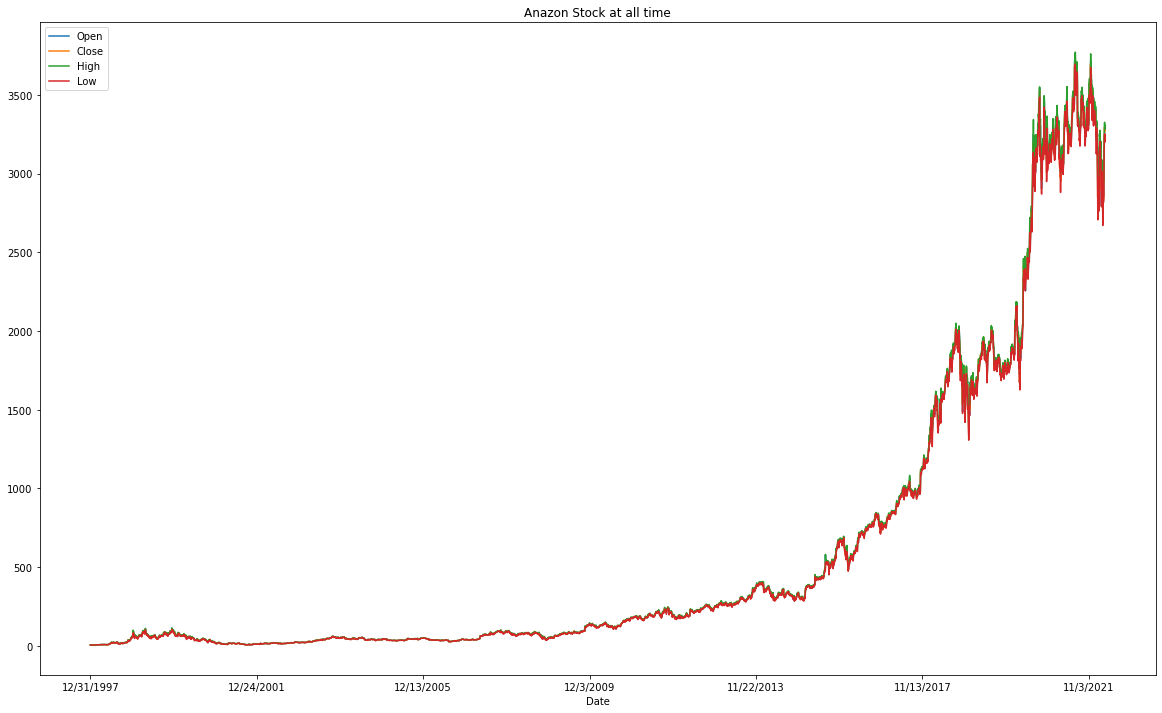

In [8]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Anazon Stock at all time')

Text(0, 0.5, 'Stock action')

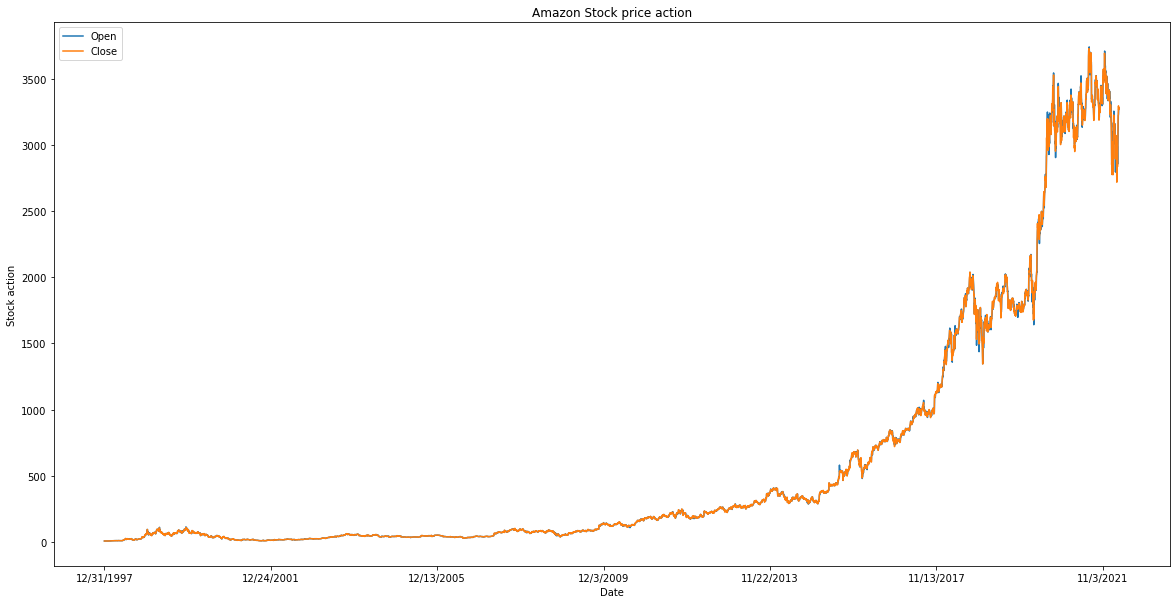

In [9]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

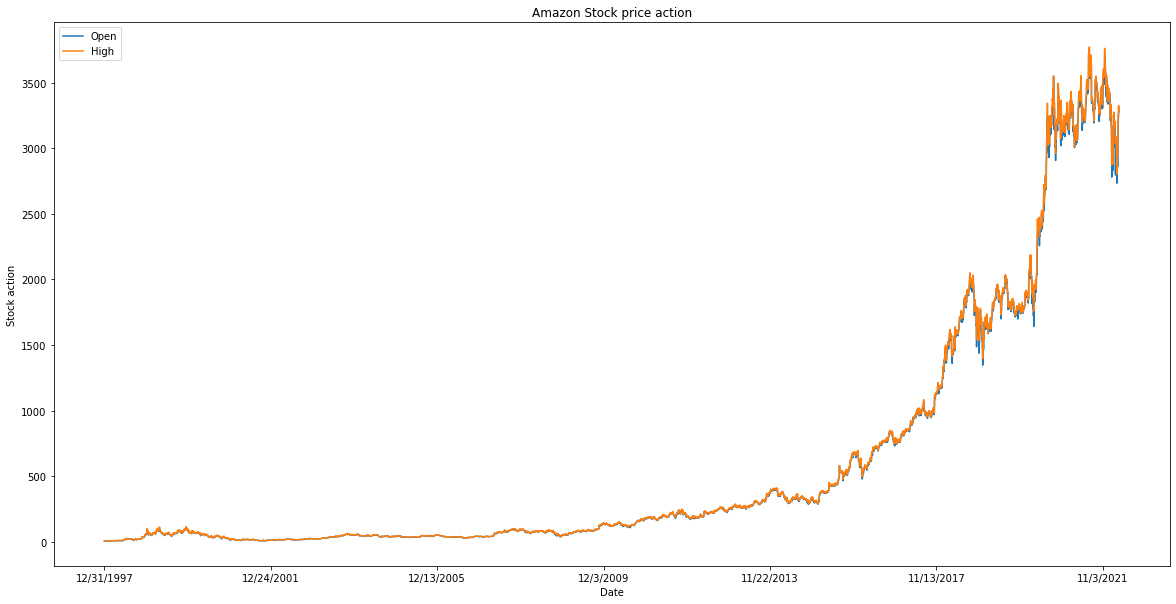

In [10]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

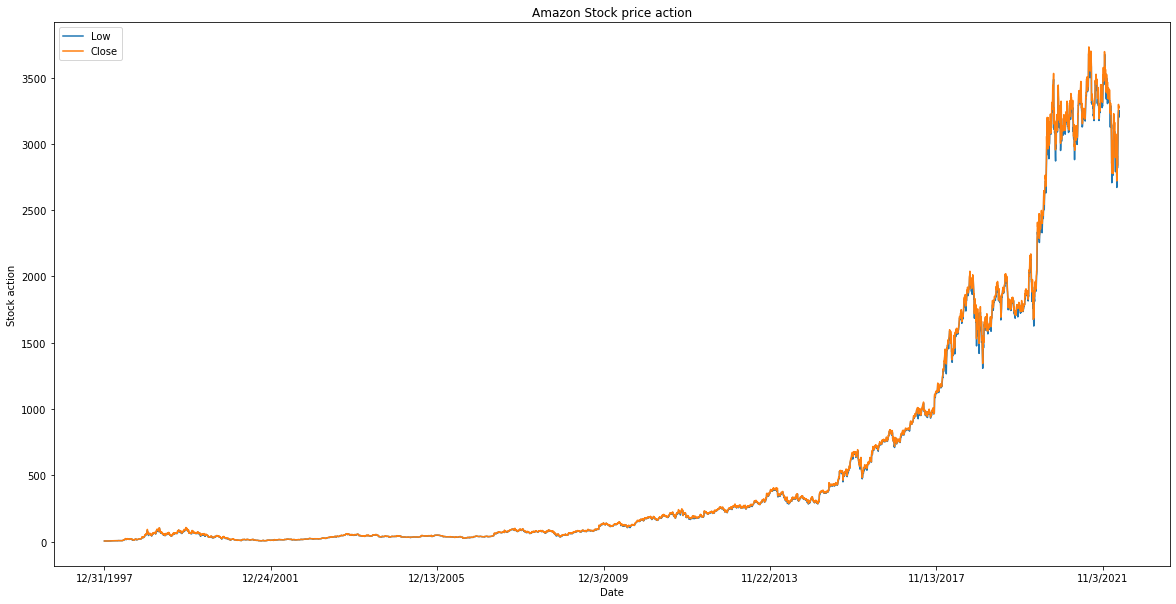

In [11]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

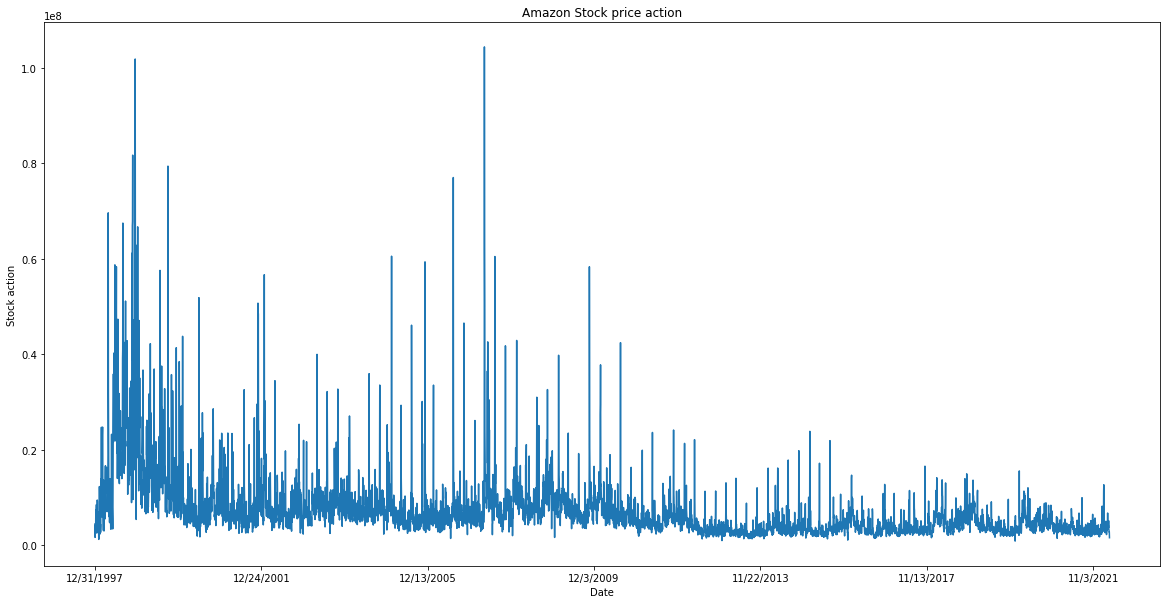

In [12]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

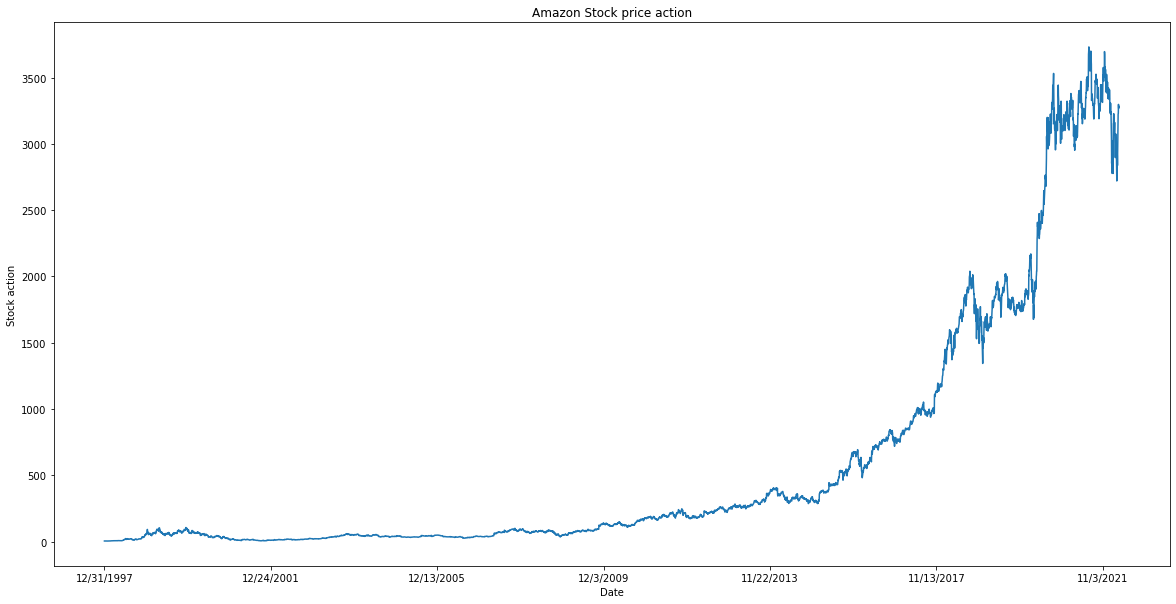

In [13]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

In [14]:
Ama = df['2010':'2022']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

KeyError: '2010'

In [15]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021')

NameError: name 'Ama' is not defined

In [16]:
Ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

NameError: name 'Ama' is not defined

In [17]:

Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022')

NameError: name 'Ama' is not defined

In [20]:
Ama.describe()

NameError: name 'Ama' is not defined

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [23]:
print(adf_test(df['High']))


Results of Dickey-Fuller Test:
Test Statistic                    2.248104
p-value                           0.998920
#Lags Used                       31.000000
Number of Observations Used    6067.000000
Critical Value (1%)              -3.431428
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [24]:
print(adf_test(df['High'].resample('MS').mean()))


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [25]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()


print(adf_test(Ama_open_diff))

NameError: name 'Ama' is not defined

In [26]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)


In [27]:
kpss_test(Ama['High'])


NameError: name 'Ama' is not defined

In [28]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

NameError: name 'Ama' is not defined

In [29]:
kpss_test(Ama['High_diff'].dropna())


NameError: name 'Ama' is not defined

In [30]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())


NameError: name 'Ama' is not defined

In [31]:
adf_test(Ama['High_diff'].dropna())

NameError: name 'Ama' is not defined